In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, ReLU, Softmax
from sklearn.preprocessing import OneHotEncoder

In [29]:
# Load and prepare CIFAR-10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# One-hot encode the labels
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train).toarray()
y_test_ohe = ohe.fit_transform(y_test).toarray()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 302s 386ms/step - accuracy: 0.7501 - loss: 0.7084 - val_accuracy: 0.7298 - val_loss: 0.7786
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 309s 370ms/step - accuracy: 0.8130 - loss: 0.5300 - val_accuracy: 0.7552 - val_loss: 0.7269


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 284s 361ms/step - accuracy: 0.4104 - loss: 1.6103 - val_accuracy: 0.6043 - val_loss: 1.1256
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 319s 358ms/step - accuracy: 0.6783 - loss: 0.9186 - val_accuracy: 0.7141 - val_loss: 0.8327
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 357ms/step - accuracy: 0.7699 - loss: 0.6629 - val_accuracy: 0.7510 - val_loss: 0.7319
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 330s 368ms/step - accuracy: 0.8327 - loss: 0.4819 - val_accuracy: 0.7465 - val_loss: 0.7639
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 322s 368ms/step - accuracy: 0.8907 - loss: 0.3109 - val_accuracy: 0.7537 - val_loss: 0.7946
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 359ms/step - accuracy: 0.9354 - loss: 0.1913 - val_accuracy: 0.7531 - val_loss: 0.9293
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 323s 360ms/step - accuracy: 0.9592 - loss: 0.1223 - val_accuracy: 0.7518 - val_loss: 1.1202
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 321s 359ms/step - accuracy: 0.9703 -

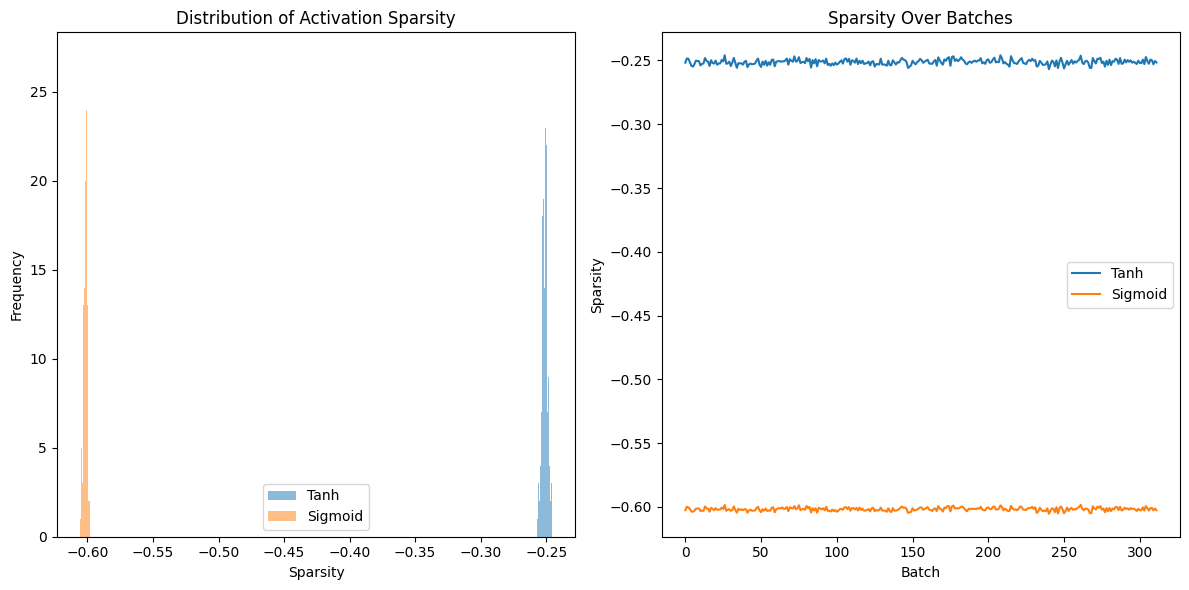


Detailed Statistics:
Tanh Sparsity - Min: -0.257, Max: -0.246, Std: 0.002
Sigmoid Sparsity - Min: -0.605, Max: -0.598, Std: 0.001


In [30]:
# Define the model
def create_model():
    model = Sequential()

    # Conv layers
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same'))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same'))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same'))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

    # Flatten and Dense layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Softmax())

    return model

# Create and compile the model
model = create_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Train the model
history = model.fit(x_train, y_train_ohe,
                   validation_data=(x_test, y_test_ohe),
                   epochs=10,
                   batch_size=64)


def tanh_approx_tf(beta, activations):
    """
    Tanh approximation of step function
    """
    return tf.tanh(beta * activations)

def sigmoid_approx_tf(beta, activations):
    """
    Sigmoid approximation of step function
    """
    return tf.sigmoid(beta * activations)

def calculate_Lsparsity_tf(activations, beta=16, use_tanh=True):
    """
    Calculate sparsity loss using either tanh or sigmoid approximation
    """
    E = 0  # Sum of activation approximations
    k = 0  # Total number of neurons

    # Process each layer's activations
    for layer_activations in activations:
        layer_activations = tf.convert_to_tensor(layer_activations)

        # Choose approximation function
        if use_tanh:
            approx = tanh_approx_tf(beta, layer_activations)
        else:
            approx = sigmoid_approx_tf(beta, layer_activations)

        # Sum up approximations and count neurons
        E += tf.reduce_sum(approx).numpy()
        k += np.prod(layer_activations.shape)

    # Calculate final sparsity measure
    Lsparsity = -E / k
    return Lsparsity

def get_activations(model, inputs):
    """
    Get activations from all ReLU layers in the model
    """
    # Create input layer with explicit shape
    input_layer = tf.keras.layers.Input(shape=(32, 32, 3))

    # Get all ReLU layer outputs
    layer_outputs = []
    relu_layers = []
    x = input_layer

    # Rebuild model layer by layer to get access to intermediate outputs
    for layer in model.layers:
        x = layer(x)
        if isinstance(layer, tf.keras.layers.ReLU):
            relu_layers.append(layer)
            layer_outputs.append(x)

    if not layer_outputs:
        raise ValueError("No ReLU layers found in the model")

    # Create model that will return all ReLU activations
    activation_model = Model(inputs=input_layer, outputs=layer_outputs)

    # Get activations
    activations = activation_model.predict(inputs, verbose=0)

    # Ensure activations is always a list
    if not isinstance(activations, list):
        activations = [activations]

    return activations

def analyze_sparsity(model, test_data, batch_size=32):
    """
    Analyze activation sparsity of the model
    """
    print("\nAnalyzing activation sparsity...")

    # Ensure data is normalized
    if test_data.max() > 1:
        test_data = test_data / 255.0

    # Store results for each batch
    tanh_sparsities = []
    sigmoid_sparsities = []

    # Process data in batches
    num_batches = len(test_data) // batch_size

    for i in range(num_batches):
        # Get batch
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch = test_data[start_idx:end_idx]

        # Get activations for this batch
        activations = get_activations(model, batch)

        # Calculate sparsity using both approximations
        tanh_sparsity = calculate_Lsparsity_tf(activations, beta=16, use_tanh=True)
        sigmoid_sparsity = calculate_Lsparsity_tf(activations, beta=16, use_tanh=False)

        tanh_sparsities.append(tanh_sparsity)
        sigmoid_sparsities.append(sigmoid_sparsity)

        # Print progress
        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1}/{num_batches} batches...")

    # Calculate average sparsity
    avg_tanh_sparsity = np.mean(tanh_sparsities)
    avg_sigmoid_sparsity = np.mean(sigmoid_sparsities)

    # Print results
    print("\nSparsity Analysis Results:")
    print(f"Average Tanh-approximated sparsity: {avg_tanh_sparsity:.3f}")
    print(f"Average Sigmoid-approximated sparsity: {avg_sigmoid_sparsity:.3f}")

    # Plot distribution of sparsities
    plt.figure(figsize=(12, 6))

    # Plot histograms
    plt.subplot(1, 2, 1)
    plt.hist(tanh_sparsities, bins=30, alpha=0.5, label='Tanh')
    plt.hist(sigmoid_sparsities, bins=30, alpha=0.5, label='Sigmoid')
    plt.title('Distribution of Activation Sparsity')
    plt.xlabel('Sparsity')
    plt.ylabel('Frequency')
    plt.legend()

    # Plot sparsity over batches
    plt.subplot(1, 2, 2)
    plt.plot(tanh_sparsities, label='Tanh')
    plt.plot(sigmoid_sparsities, label='Sigmoid')
    plt.title('Sparsity Over Batches')
    plt.xlabel('Batch')
    plt.ylabel('Sparsity')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return {
        'tanh_sparsities': tanh_sparsities,
        'sigmoid_sparsities': sigmoid_sparsities,
        'avg_tanh_sparsity': avg_tanh_sparsity,
        'avg_sigmoid_sparsity': avg_sigmoid_sparsity
    }

# Run the analysis
if __name__ == "__main__":
    print("Starting sparsity analysis...")
    results = analyze_sparsity(model, x_test)

    # Additional analysis of results
    print("\nDetailed Statistics:")
    print(f"Tanh Sparsity - Min: {np.min(results['tanh_sparsities']):.3f}, "
          f"Max: {np.max(results['tanh_sparsities']):.3f}, "
          f"Std: {np.std(results['tanh_sparsities']):.3f}")
    print(f"Sigmoid Sparsity - Min: {np.min(results['sigmoid_sparsities']):.3f}, "
          f"Max: {np.max(results['sigmoid_sparsities']):.3f}, "
          f"Std: {np.std(results['sigmoid_sparsities']):.3f}")

In [ ]:
# TODO: NEED TO GET THE train_datagen (adversedata), train_set (clean data), and test_set data to use for sparsity calculation.

# get L(x) = Lsparsity(x) + c ∗ Lce(x), Lce from input data. Lce is equation number 6. Cross entrapy is for a function for getting most like answer.
# so cross entrapy needs to be the same even with the bad dataset. Lce as the softmax cross-entropy loss with respect to
# the ‘target’ label y. For original and adversarial inputs xclean and xadv (algo1 on page 4 = L(x) = Lsparsity(x) + c ∗ Lce(x))
# this can be expressed as.
# this whole thing is called a sparsity attack, and we will just see how daverse data is effecting the lsparsity.
# lce first x = 0
# the sparsity is for one image, batch images means batch sparsity.